In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<BarContainer object of 2 artists>

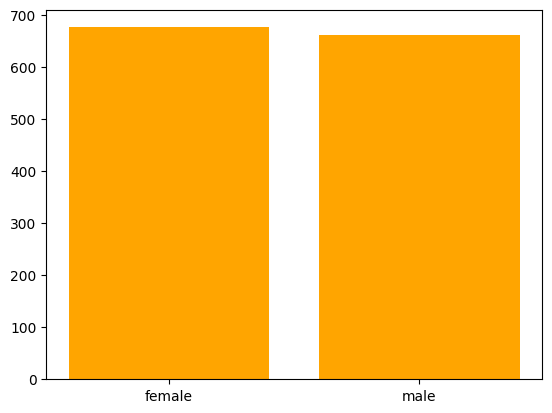

In [8]:
#how does the gender of the customers look like?
df.sex.value_counts()

plt.bar(df.sex.unique(),df.sex.value_counts(), color = "orange")

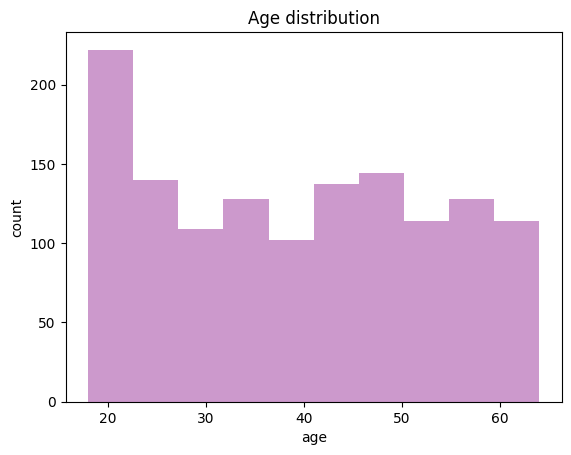

In [9]:
#how does the age vary?
plt.hist(df["age"],bins =10, label = "age", color = 'purple', alpha = 0.4)
plt.xlabel("age")
plt.ylabel("count")
plt.title("Age distribution")
plt.show()

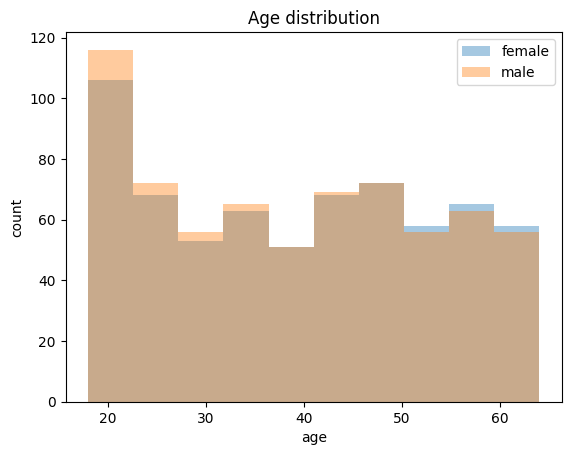

In [10]:
for sex, gender_group in df.groupby(["sex"]):
    plt.hist(gender_group.age ,bins =10, label = sex, alpha = 0.4)
plt.legend()
plt.xlabel("age")
plt.ylabel("count")
plt.title("Age distribution")
plt.show()

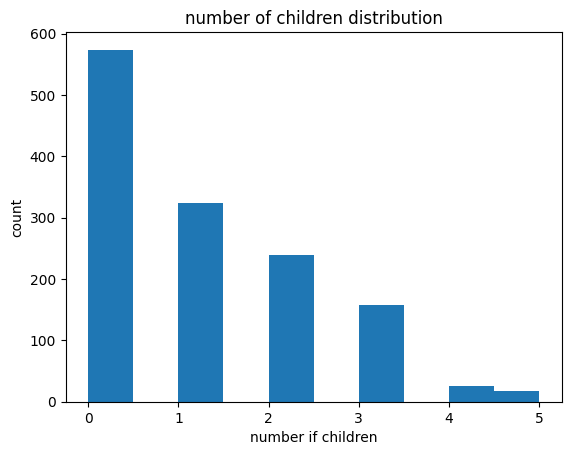

In [11]:
plt.hist(df.children)
plt.xlabel("number if children")
plt.ylabel("count")
plt.title("number of children distribution")
plt.show()

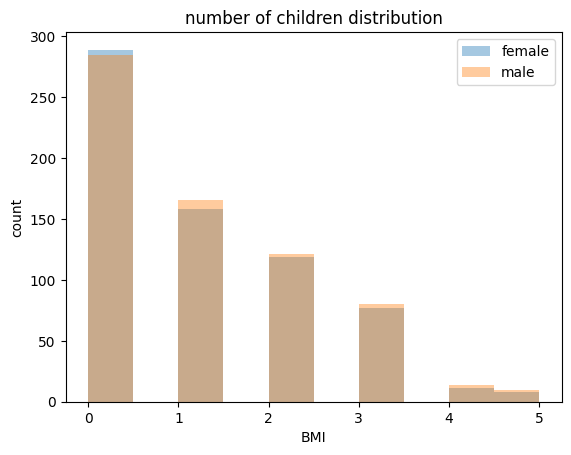

In [12]:
for sex, gender_group in df.groupby(["sex"]):
    plt.hist(gender_group.children ,bins =10, label = sex, alpha = 0.4)
plt.legend()
plt.xlabel("BMI")
plt.ylabel("count")
plt.title("number of children distribution")
plt.show()

/tmp/ipython-input-1221245272.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


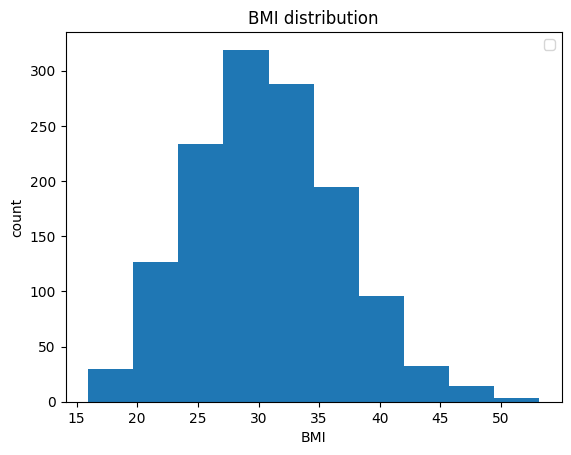

In [13]:
plt.hist(df.bmi ,bins =10)
plt.legend()
plt.xlabel("BMI")
plt.ylabel("count")
plt.title("BMI distribution")
plt.show()

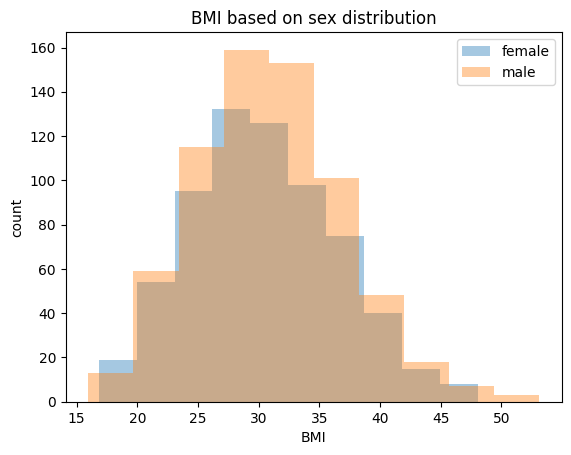

In [14]:
for sex, gender_group in df.groupby(["sex"]):
    plt.hist(gender_group.bmi ,bins =10, label = sex, alpha = 0.4)
plt.legend()
plt.xlabel("BMI")
plt.ylabel("count")
plt.title("BMI based on sex distribution")
plt.show()

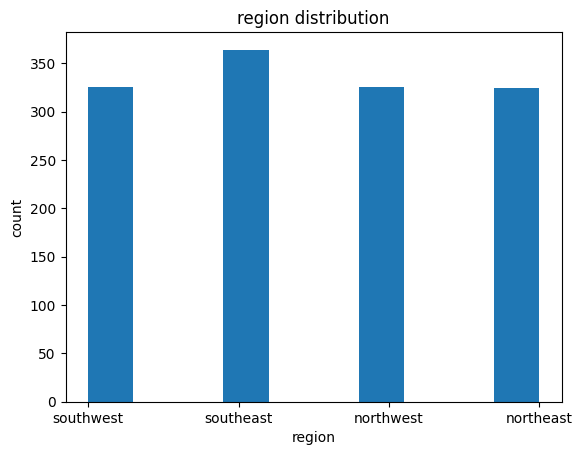

In [15]:

plt.hist(df.region ,bins =10)
plt.xlabel("region")
plt.ylabel("count")
plt.title("region distribution")
plt.show()

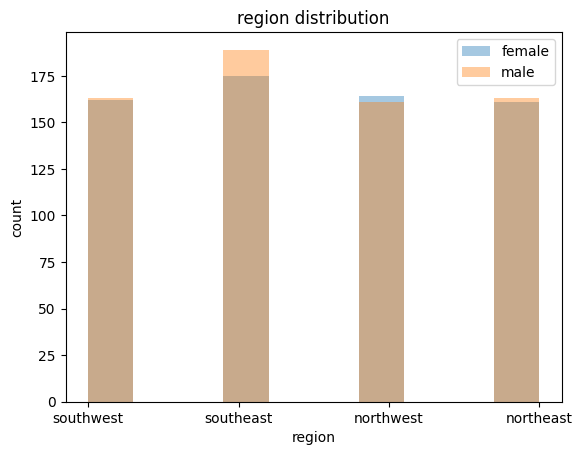

In [16]:
for sex, gender_group in df.groupby(["sex"]):
    plt.hist(gender_group.region ,bins =10, label = sex, alpha = 0.4)
plt.legend()
plt.xlabel("region")
plt.ylabel("count")
plt.title("region distribution")
plt.show()

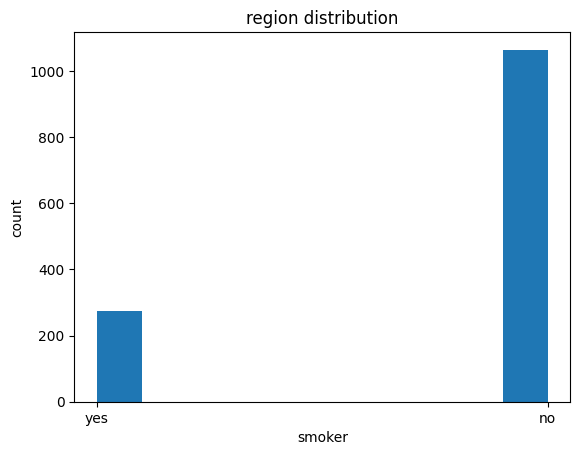

In [17]:
plt.hist(df.smoker ,bins =10)
plt.xlabel("smoker")
plt.ylabel("count")
plt.title("region distribution")
plt.show()

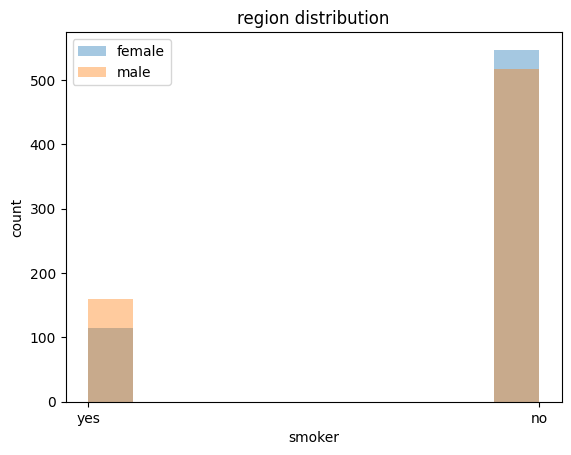

In [18]:
for sex, gender_group in df.groupby(["sex"]):
    plt.hist(gender_group.smoker ,bins =10, label = sex, alpha = 0.4)
plt.legend()
plt.xlabel("smoker")
plt.ylabel("count")
plt.title("region distribution")
plt.show()

In [31]:
if df["smoker"].dtype == 'object':
    df["smoker"] = df["smoker"].map({"yes":1, "no":0})

if df["sex"].dtype == 'object':
    df["sex"] = df["sex"].map({"male":1, "female":0})

In [32]:
if df["region"].dtype == 'object':
    df["region"] = df["region"].map({"southwest":0, "southeast":1, "northwest":2, "northeast":3})

In [22]:

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,NaN,27.900,0,NaN,0,16884.92400
1,18,NaN,33.770,1,NaN,1,1725.55230
2,28,NaN,33.000,3,NaN,1,4449.46200
3,33,NaN,22.705,0,NaN,2,21984.47061
4,32,NaN,28.880,0,NaN,2,3866.85520


In [35]:
df.dropna(inplace=True)
X = df.drop(["charges"], axis = 1)
y = df["charges"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [39]:
import pandas as pd

df = pd.read_csv("insurance.csv")

df_model = df.copy()

df_model["smoker"] = df_model["smoker"].map({"yes":1, "no":0})
df_model["sex"]    = df_model["sex"].map({"male":1, "female":0})
df_model["region"] = df_model["region"].map({"southwest":0, "southeast":1, "northwest":2, "northeast":3})

# Remove or fix any NaN that may appear
df_model = df_model.dropna()   # or df_model = df_model.fillna(df_model.median(numeric_only=True))

print(df_model.isna().sum())
df_model.head()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# Split
X = df_model.drop(columns=["charges"])
y = df_model["charges"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: Impute missing → Train model
lr = make_pipeline(SimpleImputer(strategy="median"), LinearRegression())
lr.fit(x_train, y_train)


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('linearregression', LinearRegression())])

In [41]:
svm = SVR()
svm.fit(x_train, y_train)

SVR()

In [42]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [44]:
y_prediction_lr = lr.predict(x_test)
y_prediction_svm = svm.predict(x_test)
y_prediction_rf = rf.predict(x_test)
y_prediction_gb = gb.predict(x_test)

df_prediction = pd.DataFrame({"actual":y_test, "LinearRegression":y_prediction_lr, \
                                "svm": y_prediction_svm, "RandomForest":y_prediction_rf, "GradientBoosting": y_prediction_gb})

In [45]:
df_prediction.head()

,actual,LinearRegression,svm,RandomForest,GradientBoosting
764,9095.06825,8924.407244,9548.501784,11428.025604,11001.128629
887,5272.17580,7116.295018,9493.253027,5173.889998,5840.174656
890,29330.98315,36909.013521,9648.297116,28385.298847,28001.980112
1293,9301.89355,9507.874691,9555.223014,10683.217217,9745.291602
259,33750.29180,27013.350008,9421.474560,34866.829935,33639.100981


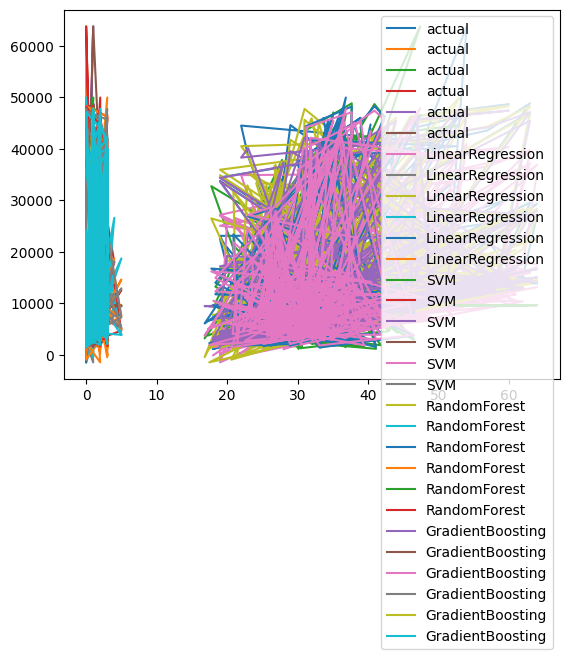

In [46]:
plt.plot(x_test, df_prediction.actual,"-", label = "actual")
plt.plot(x_test, df_prediction.LinearRegression,"-", label = "LinearRegression")
plt.plot(x_test, df_prediction.svm,"-", label = "SVM")
plt.plot(x_test, df_prediction.RandomForest,"-", label = "RandomForest")
plt.plot(x_test, df_prediction.GradientBoosting,"-", label = "GradientBoosting")
plt.legend()
plt.show()

In [47]:
from sklearn import metrics

In [49]:
score_lr = metrics.r2_score(y_test, y_prediction_lr)
score_svm = metrics.r2_score(y_test, y_prediction_svm)
score_rf = metrics.r2_score(y_test, y_prediction_rf)
score_gb = metrics.r2_score(y_test, y_prediction_gb)

print("Score of Linear regssion model",score_lr)
print("Score of SVM model",score_svm)
print("Score of Random Forest model",score_rf)
print("Score of Gradient boositng model",score_gb)

Score of Linear regssion model 0.7833463107364539
Score of SVM model -0.07230841842488811
Score of Random Forest model 0.8638903711149986
Score of Gradient boositng model 0.8779726251291786


Score of Linear regssion model 0.7833463107364539:

This score indicates that the linear regression model explains about 78.3% of the variance in the target variable. This is a relatively good score, suggesting that the model fits the data well.

Score of SVM model -0.07230841842488811:

A negative R² score indicates that the SVM model performs worse than a simple mean-based model. This suggests that the SVM model is not appropriate for your data in its current form and may need parameter tuning or different feature engineering.

Score of Random Forest model 0.8633921974484546:

This score indicates that the random forest model explains about 86.3% of the variance in the target variable, which is very good. This suggests that the random forest model fits the data quite well.

Score of Gradient boositng model 0.8779936181637191:

This score indicates that the gradient boosting model explains about 87.8% of the variance in the target variable, which is excellent. This is the best-performing model among the ones you listed, suggesting it captures the relationships in the data very effectively.

In [50]:
MAE_lr = metrics.mean_absolute_error(y_test, y_prediction_lr)
MAE_svm = metrics.mean_absolute_error(y_test, y_prediction_svm)
MAE_rf = metrics.mean_absolute_error(y_test, y_prediction_rf)
MAE_gb = metrics.mean_absolute_error(y_test, y_prediction_gb)

print("Mean absolute error of Linear regssion model",MAE_lr)
print("Mean absolute error of SVM model",MAE_svm)
print("Mean absolute error of Random Forest model",MAE_rf)
print("Mean absolute error of Gradient boositng model",MAE_gb)

Mean absolute error of Linear regssion model 4186.508898366432
Mean absolute error of SVM model 8592.79866979489
Mean absolute error of Random Forest model 2512.565327525778
Mean absolute error of Gradient boositng model 2447.9515580545844


The Mean Absolute Error (MAE) results for this models indicate how well each model performs in predicting the target variable.

Explanation of the Results

Linear Regression Model

MAE: 4186.51
This value indicates that, on average, the linear regression model's predictions are off by about 4186.51 units from the actual values. This suggests that the linear regression model has a moderate level of accuracy, but there is significant room for improvement.

SVM Model

MAE: 8592.80
The SVM model has the highest MAE among all the models, indicating that its predictions are, on average, off by about 8592.80 units from the actual values. This high MAE suggests that the SVM model is not performing well on this dataset, and it may require significant tuning or may not be suitable for this particular problem.

Random Forest Model

MAE: 2514.69
The Random Forest model has a much lower MAE compared to the linear regression and SVM models, with an average error of 2514.69 units. This indicates that the Random Forest model is performing quite well and is better at capturing the underlying patterns in the data compared to the previous models.

Gradient Boosting Model

MAE: 2447.17
The Gradient Boosting model has the lowest MAE at 2447.17, suggesting that it is the most accurate model among those evaluated. This model is best at minimizing the average prediction error, indicating its effectiveness in capturing the complexities of the data.






In [51]:
data = pd.DataFrame({"age": 40, "sex": 1, "bmi": 24.5,\
                        "children":3,"smoker":0, "region": 2}, index = [0])
data

,age,sex,bmi,children,smoker,region
0,40,1,24.5,3,0,2


In [52]:

new_prediction = gb.predict(data)
print(new_prediction)

[7772.90845279]


In [53]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [54]:
import joblib

In [55]:
joblib.dump(gr, "model_joblib_gr")

['model_joblib_gr']

In [56]:
model = joblib.load('model_joblib_gr')

In [57]:
model.predict(data)

array([8026.29188632])

The difference in the predicted value is due to the change in the training dataset